# **MACHINE LEARNING: BIKE SHARING CUSTOMER PREDICTION MODEL**

**CONTEXT**  

Capital Bikeshare, yang diluncurkan pada tanggal 20 September 2010, adalah program bike sharing terkemuka yang beroperasi di wilayah metropolitan Washington, D.C. Ia menawarkan solusi transportasi inovatif dengan menyediakan jaringan sepeda untuk penyewaan jangka pendek. Capital Bikeshare memungkinkan penghuni dan pengunjung dengan nyaman menyewa sepeda dari berbagai stasiun docking yang tersebar di seluruh kota. Pengguna dapat memeriksa sepeda dari satu stasiun dan mengembalikannya ke stasiun lain dalam sistem, menjadikannya moda transportasi yang fleksibel untuk bepergian, bersepeda santai, atau menjelajahi atraksi kota. Dengan mempromosikan pilihan transportasi yang berkelanjutan dan sehat, Capital Bikeshare telah menjadi bagian integral dari komunitas D.C. Perusahaan ini telah beroperasi sejak diluncurkan dan terus menyediakan layanan berbagi sepeda, menawarkan cara ramah lingkungan untuk berkeliling kota sekaligus mengurangi kemacetan lalu lintas dan mendorong lingkungan yang lebih hijau.

**PROBLEM STATEMENT**  
Pada studi kasus ini,Capital Bikeshare memasuki tahun 2013 tim strategi bisnis perlu menyiapkan tool untuk memprediksi banyaknya kebutuhan unit sepeda


**GOALS**  
Berdasarkan permasalahan di atas, tim Business Strategic Capital Bikeshare memerlukan suatu alat yang dapat membuat prediksi jumlah total pelanggan potensial tahun depan dan lokasi baru sehingga dapat mempersiapkan kebutuhan operasional dan memitigasi kerugian.

Dengan menggunakan model prediksi yang tepat yang dapat memprediksi jumlah total pelanggan berdasarkan fitur, Capital Bikeshare dapat memiliki alasan yang kuat untuk mempersiapkan kebutuhan operasional yang memenuhi permintaan sehingga berjalan lebih efisien untuk meminimalkan kerugian dan memaksimalkan keuntungan. Mereka juga dapat merencanakan ekspansi mereka dengan mengetahui pelanggan potensial di lokasi baru dan menyesuaikan biaya berdasarkan simulasi keuntungan.

**ANALYTICS APPROACH**  
Kumpulan data Berbagi Sepeda ini berisi variabel seperti tanggal, waktu, kelembapan, suhu, hari libur, musim, dan cuaca. Variabel-variabel tersebut dapat menjelaskan tentang jumlah pelanggan. Variabel membentuk jumlah total pelanggan. Kita harus melakukan analisis terhadap variabel-variabel tersebut.

Dalam membuat model ini, Pertama, kita dapat menganalisis korelasi antara Xs (variabel independen) dan Y (target) untuk memastikan setiap X mempunyai pengaruh untuk membentuk Y. Kita juga harus melihat korelasi antar X untuk menghindari multikolinearitas (kesamaan makna antar variabel). Xs karena X harus benar-benar mandiri. Dengan mengetahui dampak Xs terhadap Y, kita dapat membuat model yang lebih akurat untuk memprediksi jumlah calon pelanggan.

**METRIC EVALUATION**  
Evaluasi Metrik yang akan digunakan dalam pemilihan model ini adalah MAE, MAPE, MSE, dan RMSE. Dalam penggunaan metrik tersebut dirumuskan berdasarkan error atau sisa. MAE adalah rata-rata kesalahan/sisa (mutlak). MAPE (berdasarkan MAE) adalah rata-rata persentase kesalahan (mutlak). MSE adalah versi kuadrat dari MAE. RMSE adalah versi MSE yang di-root. Karena MAE kecil mewakili model yang lebih akurat, MAPE, MSE, dan RMSE juga demikian. Semakin kecil nilainya, semakin akurat modelnya. Metrik utama yang akan digunakan disini adalah MAPE, metrik lainnya sedang dalam tahap pertimbangan untuk mendukung atau membenarkan skor MAPE.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Data Understanding & Cleaning**

In [27]:
df = pd.read_csv('data_bike_sharing.csv')



### **Attributes Information**
Dataset used here is a total customers day-to-day based on environmental variable from 2011 to 2012.
| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date  |
| hum | Float | Normalized humidity (the values are divided to 100) |
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
| holiday | integer | holiday or not |
| season | integer | season 1: winter 2: spring 3: summer 4: fall |
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| temp | Float | normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| hr | Integer |hour (0 to 23) |
| casual | Integer | count of casual users |
| registered | Integer | registered users |
| cnt | Integer | count of total rental bikes including both casual and registered |

<br>

In [28]:
# Data Desc
df['dteday'] = pd.to_datetime(df['dteday'])
df.insert(1,'month',df['dteday'].dt.month)

listItem = []
for col in df.columns :
    listItem.append([col,
                     df[col].dtype,
                     df[col].isna().sum(),
                     round(((df[col].isna().sum()) / (len(df))) * 100 , 2),
                     df[col].nunique(),
                     list(df[col].drop_duplicates().sample(5,replace=True).values)])

desc = ['date',
        'month (from date)',
        'relative humidity',
        '1: Clear, Few clouds, Partly cloudy, Partly cloudy -- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds -- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',
        'whether the day is considered a holiday',
        '1 = spring -- 2 = summer -- 3 = fall -- 4 = winter',
        '"feels like" temperature in Celsius',
        'temperature in Celsius',
        'time of rent (hour)',
        'number of non-registered user rentals initiated',
        'number of registered user rentals initiated',
        'number of total rentals']
descData = pd.DataFrame(data = listItem,
                        columns = ['column',
                                   'Data Type',
                                   'Missing Values',
                                   'Pct Missing Values',
                                   'Num Unique',
                                   'Unique Sample'])
descData.insert(1,'desc',desc)

display(descData.merge(df.describe().transpose().reset_index().rename({'index' : 'column'},axis=1),
                       'left',
                       'column'))

,column,desc,Data Type,Missing Values,Pct Missing Values,Num Unique,Unique Sample,count,mean,min,25%,50%,75%,max,std
0,dteday,date,datetime64[ns],0,0.0,731,"[2011-12-31T00:00:00.000000000, 2012-06-07T00:...",12165,2012-01-01 02:04:45.869297408,2011-01-01 00:00:00,2011-07-02 00:00:00,2012-01-02 00:00:00,2012-07-03 00:00:00,2012-12-31 00:00:00,NaN
1,month,month (from date),int32,0,0.0,12,"[7, 8, 5, 9, 1]",12165.0,6.510974,1.0,4.0,7.0,9.0,12.0,3.433995
2,hum,relative humidity,float64,0,0.0,89,"[0.75, 0.37, 0.73, 0.42, 0.17]",12165.0,0.625451,0.0,0.47,0.62,0.78,1.0,0.192102
3,weathersit,"1: Clear, Few clouds, Partly cloudy, Partly cl...",int64,0,0.0,4,"[2, 3, 2, 2, 4]",12165.0,1.416934,1.0,1.0,1.0,2.0,4.0,0.635937
4,holiday,whether the day is considered a holiday,int64,0,0.0,2,"[1, 0, 0, 1, 0]",12165.0,0.029758,0.0,0.0,0.0,0.0,1.0,0.169925
5,season,1 = spring -- 2 = summer -- 3 = fall -- 4 = wi...,int64,0,0.0,4,"[4, 2, 4, 1, 1]",12165.0,2.488615,1.0,2.0,2.0,3.0,4.0,1.106157
6,atemp,"""feels like"" temperature in Celsius",float64,0,0.0,65,"[0.7424, 0.3939, 0.6061, 0.7121, 0.3485]",12165.0,0.476996,0.0,0.3333,0.4848,0.6212,1.0,0.171857
7,temp,temperature in Celsius,float64,0,0.0,50,"[0.76, 0.68, 0.3, 0.2, 0.1]",12165.0,0.498185,0.02,0.34,0.5,0.66,1.0,0.192492
8,hr,time of rent (hour),int64,0,0.0,24,"[18, 8, 21, 21, 4]",12165.0,11.51977,0.0,6.0,12.0,18.0,23.0,6.931872
9,casual,number of non-registered user rentals initiated,int64,0,0.0,305,"[297, 208, 230, 20, 144]",12165.0,35.834443,0.0,4.0,17.0,49.0,362.0,49.489286


Dalam mempersiapkan data untuk pemodelan kita harus melihat data yang memiliki nilai yang hilang dan outlier. Karena bisa berdampak pada performa model.

Dalam kumpulan data ini, kami tidak memiliki nilai yang hilang, dan distribusinya juga tampak bagus. Kami memiliki banyak kolom yang bersifat kategoris, hanya hum dan temp/atemp yang kontinu.

Kita akan melihat outlier pada kolom yang berkesinambungan tersebut.

## **Outliers**

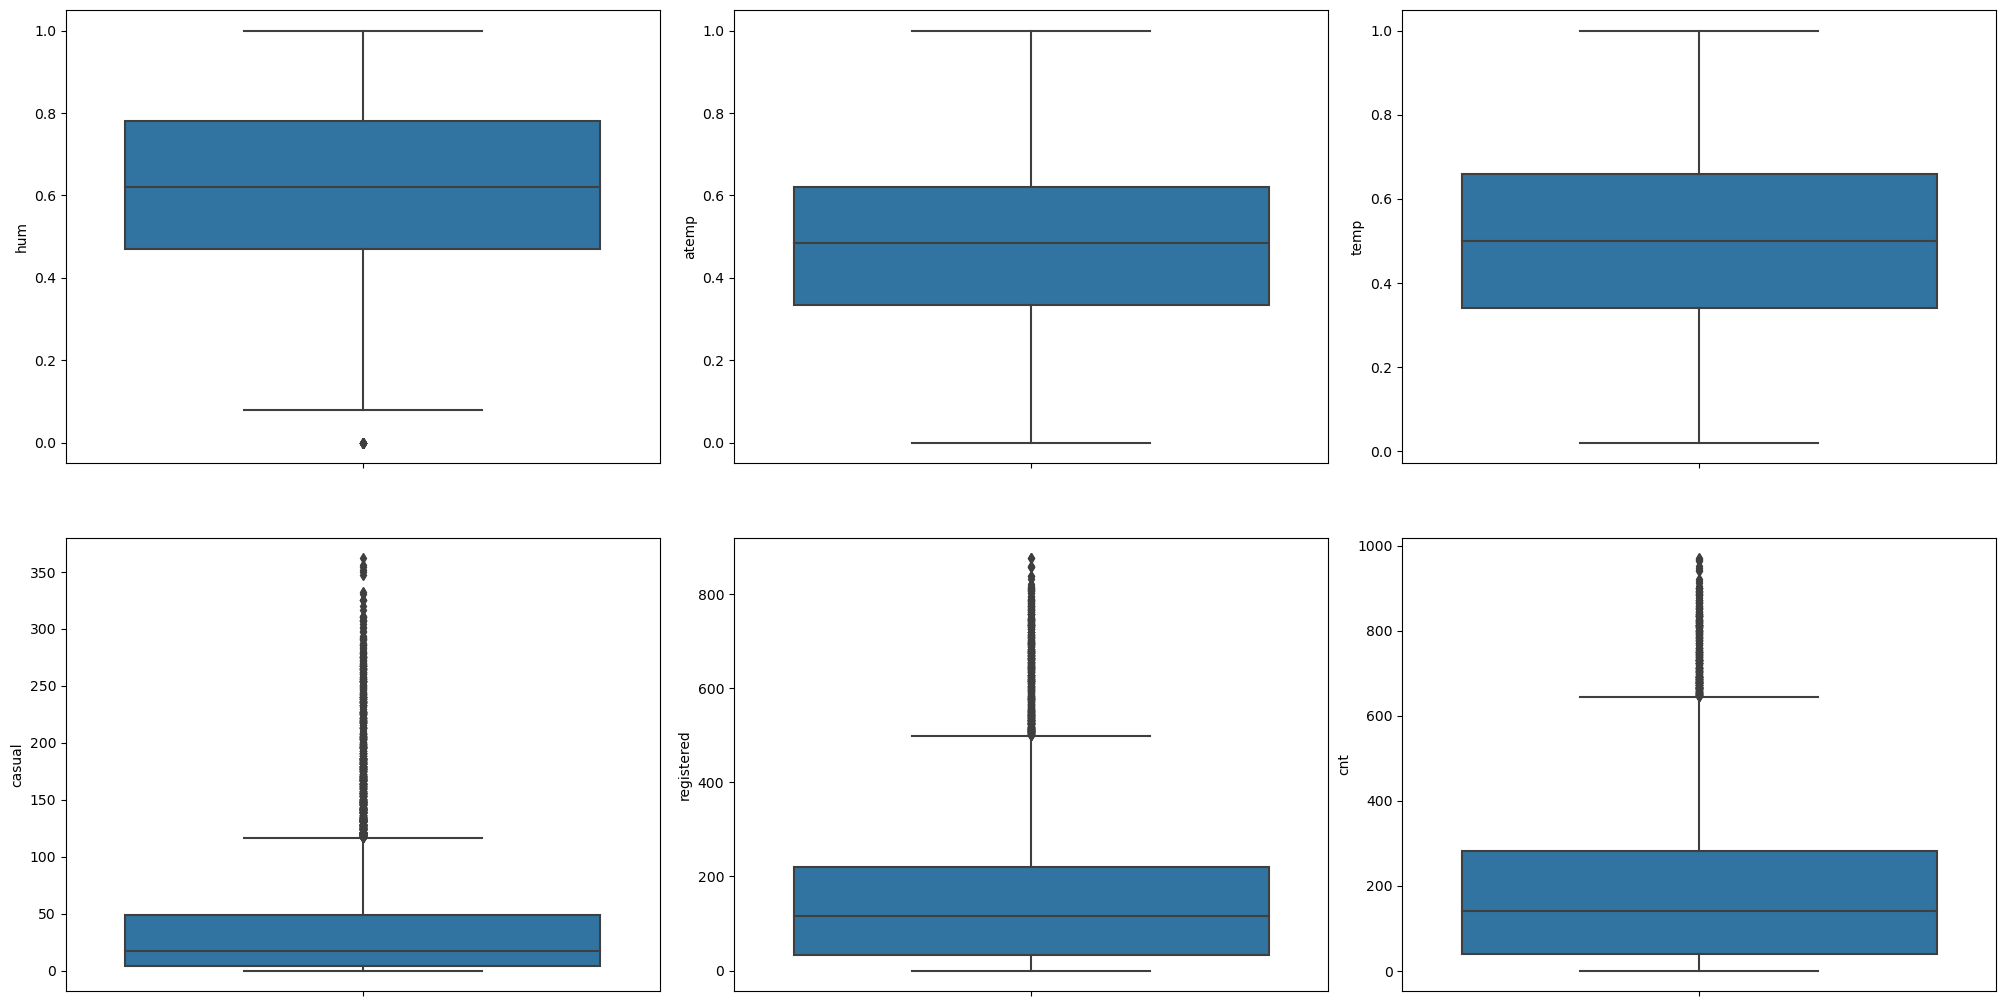

In [29]:
numericCols = df.drop(['month','weathersit','holiday','season','hr'],axis=1).select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Terlihat ada beberapa outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [30]:

def remove_outliers(df, columns):
  
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
       
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        df = df.drop(outliers.index)
        
    return df

# Example usage:
df_cleaned = remove_outliers(df, ['hum', 'cnt'])
print("shape after outliers removal :",df_cleaned.shape)

shape after outliers removal : (11813, 12)


## **EDA**

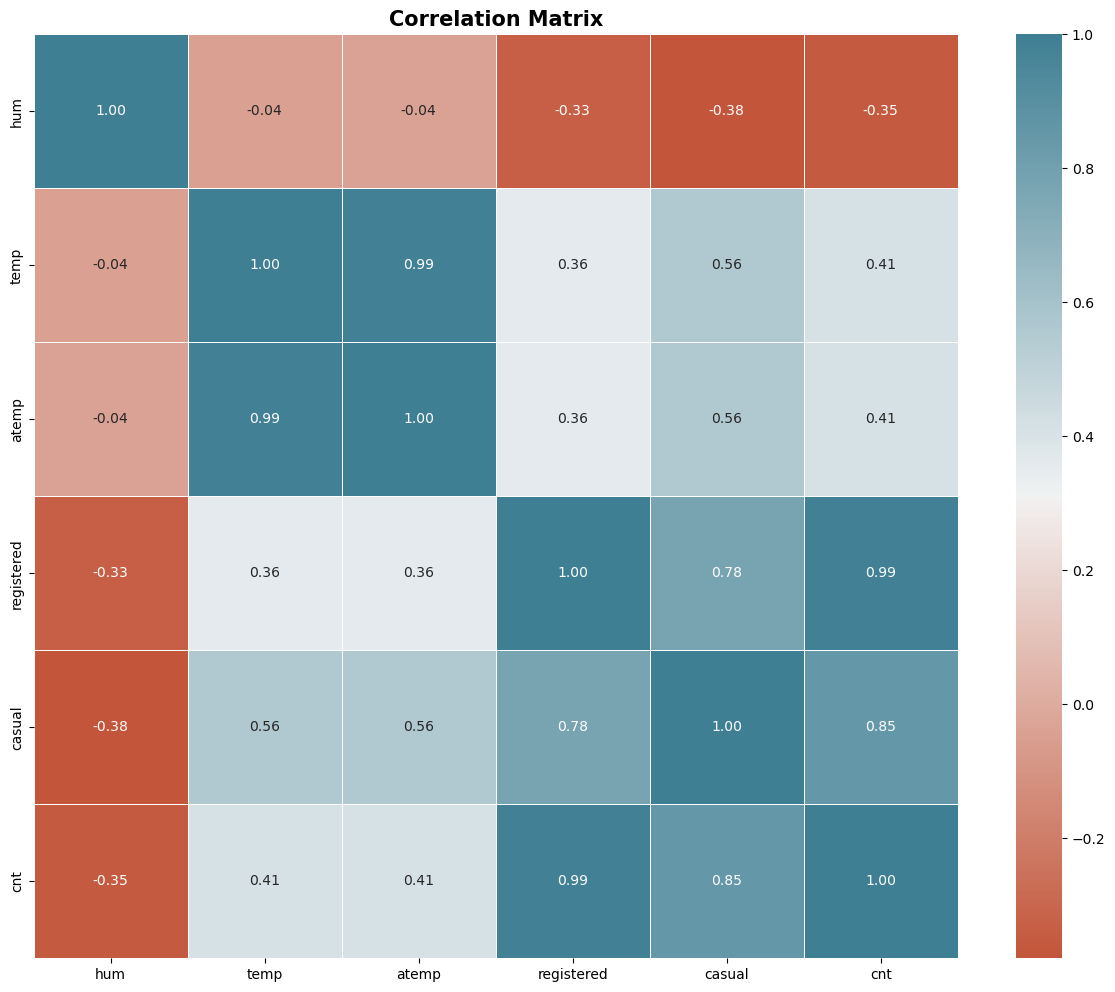

In [31]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
dfBikeCorr = df_cleaned[['hum','temp','atemp','registered','casual','cnt']].corr('spearman')
sns.heatmap(dfBikeCorr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Grafik di atas menunjukkan korelasi antar variabel numerik dan jumlah total pelanggan.  Seperti yang terlihat di atas, temp dan atemp bersifat multikolinear (artinya sama, tujuannya sama), jadi kita bisa memilih salah satunya.registered dan casual juga secara langsung menentukan jumlah total pelanggan.

In [32]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
calc_vif(df_cleaned[["hum", "atemp", "temp", "casual", "registered"]])


,variables,VIF
0,hum,6.378184
1,atemp,329.590584
2,temp,299.844216
3,casual,2.606032
4,registered,2.991773


dari tabel diatas kita bisa lihat hum dan atemp memiliki nilai yg tinggi sehingga bisa kita hapus dari data

In [33]:
df_cleaned.head(5)

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145
5,2012-10-01,10,0.72,1,0,4,0.4545,0.46,0,6,39,45


hasil akhir dari process data cleaning

# **Data Preprocessing**

Pada tahap ini, kita akan melakukan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [34]:
df_model=df_cleaned.copy()
df_model= pd.DataFrame(df_model)

## **Feature Engineering**
Menambahkan beberapa fitur agar model lebih baik dalam membaca pola data

In [35]:
#rush hour
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return 1
    else:
        return 0

df_model['rush_hour'] = df_model['hr'].apply(is_rush_hour)



In [36]:
#splitting date into month/day/year/dayname
#day
dayDate =df_model['dteday'].dt.day
df_model['dayDate'] = dayDate
df_model


,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,rush_hour,dayDate
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,0,9
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,0,17
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,0,15
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,1,31
5,2012-10-01,10,0.72,1,0,4,0.4545,0.46,0,6,39,45,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,1,25
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,0,6
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,0,20
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,0,31


In [37]:
#day name
dayName = df_model['dteday'].dt.strftime('%A')
display(dayName)
dayMapper = {'Monday' : 1,
             'Tuesday' : 2,
             'Wednesday' : 3,
             'Thursday' : 4,
             'Friday' : 5,
             'Saturday' : 6,
             'Sunday' : 7}

dayName = dayName.map(dayMapper)
df_model['dayName'] = dayName
df_model

0           Friday
1           Sunday
2        Wednesday
3         Saturday
5           Monday
           ...    
12160    Wednesday
12161       Friday
12162       Monday
12163     Saturday
12164     Thursday
Name: dteday, Length: 11813, dtype: object

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,rush_hour,dayDate,dayName
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,0,9,5
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,0,17,7
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,0,15,3
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,1,31,6
5,2012-10-01,10,0.72,1,0,4,0.4545,0.46,0,6,39,45,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,1,25,3
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,0,6,5
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,0,20,1
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,0,31,6


In [38]:
#year
yearDate = df_model['dteday'].dt.year
df_model['year'] = yearDate
df_model

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,rush_hour,dayDate,dayName,year
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,0,9,5,2011
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,0,17,7,2012
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,0,15,3,2011
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,1,31,6,2012
5,2012-10-01,10,0.72,1,0,4,0.4545,0.46,0,6,39,45,0,1,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,1,25,3,2012
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,0,6,5,2012
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,0,20,1,2012
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,0,31,6,2012


In [39]:
#weekdays
df_model['weekdays'] = np.where(df_model['dayName'] > 5, 0, 1)
df_model

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,rush_hour,dayDate,dayName,year,weekdays
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,0,9,5,2011,1
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,0,17,7,2012,0
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,0,15,3,2011,1
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,1,31,6,2012,0
5,2012-10-01,10,0.72,1,0,4,0.4545,0.46,0,6,39,45,0,1,1,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,1,25,3,2012,1
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,0,6,5,2012,1
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,0,20,1,2012,1
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,0,31,6,2012,0


In [40]:
df_model['holiday'] = df_model['holiday'].astype('category')
df_model['weathersit'] = df_model['weathersit'].astype('category')
df_model['month'] = df_model['month'].astype('category')
df_model['hr'] = df_model['hr'].astype('category')
df_model['dayDate'] = df_model['dayDate'].astype('category')
df_model['dayName'] = df_model['dayName'].astype('category')
df_model['season'] = df_model['season'].astype('category')
df_model['weekdays'] = df_model['weekdays'].astype('category')
df_model['year'] = df_model['year'].astype('category')
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11813 entries, 0 to 12164
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      11813 non-null  datetime64[ns]
 1   month       11813 non-null  category      
 2   hum         11813 non-null  float64       
 3   weathersit  11813 non-null  category      
 4   holiday     11813 non-null  category      
 5   season      11813 non-null  category      
 6   atemp       11813 non-null  float64       
 7   temp        11813 non-null  float64       
 8   hr          11813 non-null  category      
 9   casual      11813 non-null  int64         
 10  registered  11813 non-null  int64         
 11  cnt         11813 non-null  int64         
 12  rush_hour   11813 non-null  int64         
 13  dayDate     11813 non-null  category      
 14  dayName     11813 non-null  category      
 15  year        11813 non-null  category      
 16  weekdays    11813 non-null 

merubah tipe data yang kategorikal untuk memprmudah dalam proses modelling nantinya

# **Modelling**

In [41]:
#import Library
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## **Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [42]:
encoderOHE = OneHotEncoder()
transformer = ColumnTransformer([('encodingOHE',encoderOHE,['weathersit','season','dayName'])],
                                remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('encodingOHE', OneHotEncoder(),
                                 ['weathersit', 'season', 'dayName'])])

Kami juga mengimpor alat untuk melakukan praproses data dan membuat transformator untuk membedakan proses/alat yang digunakan untuk setiap kolom.  
Kami hanya menggunakan One Hot Encoder pada preprocessing ini karena sebagian besar datanya cukup bersih.

## **Data Splitting**

In [43]:
x_data = df_model.drop(['cnt','registered','casual','dteday','atemp'],axis = 1)
y_data = df_model['cnt']

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=1)
display(df_model,
        x_train,
        x_test,
        y_train,
        y_test )

,dteday,month,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,rush_hour,dayDate,dayName,year,weekdays
0,2011-12-09,12,0.62,1,0,4,0.3485,0.36,16,24,226,250,0,9,5,2011,1
1,2012-06-17,6,0.64,1,0,2,0.5152,0.54,4,2,16,18,0,17,7,2012,0
2,2011-06-15,6,0.53,1,0,2,0.6212,0.62,23,17,90,107,0,15,3,2011,1
3,2012-03-31,3,0.87,2,0,2,0.3485,0.36,8,19,126,145,1,31,6,2012,0
5,2012-10-01,10,0.72,1,0,4,0.4545,0.46,0,6,39,45,0,1,1,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,1,0.75,1,0,1,0.2273,0.24,7,14,243,257,1,25,3,2012,1
12161,2012-07-06,7,0.62,1,0,3,0.7424,0.78,0,39,63,102,0,6,5,2012,1
12162,2012-02-20,2,0.60,2,1,1,0.2121,0.24,5,0,6,6,0,20,1,2012,1
12163,2012-03-31,3,0.77,2,0,2,0.4242,0.42,2,14,55,69,0,31,6,2012,0


,month,hum,weathersit,holiday,season,temp,hr,rush_hour,dayDate,dayName,year,weekdays
11997,11,0.61,1,0,4,0.28,6,0,4,7,2012,0
3154,4,0.63,2,0,2,0.48,0,0,26,4,2012,1
6192,5,0.88,2,0,2,0.56,5,0,9,3,2012,1
7357,2,0.40,1,0,1,0.38,23,0,16,3,2011,1
4186,5,0.82,1,0,2,0.44,23,0,6,5,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8042,7,0.83,2,0,3,0.66,19,1,3,7,2011,0
11284,4,1.00,3,0,2,0.32,2,0,23,6,2011,0
933,12,0.80,1,0,4,0.18,3,0,13,2,2011,1
5337,11,0.76,1,0,4,0.34,21,0,9,5,2012,1


,month,hum,weathersit,holiday,season,temp,hr,rush_hour,dayDate,dayName,year,weekdays
3881,3,0.66,2,0,1,0.32,10,0,15,2,2011,1
1770,11,1.00,2,0,4,0.46,14,0,16,3,2011,1
9005,2,0.29,1,0,1,0.38,13,0,13,7,2011,0
1474,4,0.66,1,0,2,0.32,8,1,12,4,2012,1
8062,9,0.45,1,0,4,0.54,10,0,23,7,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,0.57,1,0,1,0.34,13,0,28,6,2012,0
2460,4,0.35,1,0,2,0.42,21,0,12,4,2012,1
2986,12,0.42,2,0,4,0.34,13,0,12,3,2012,1
1926,2,0.94,3,0,1,0.42,10,0,25,5,2011,1


11997     16
3154      43
6192      28
7357      33
4186     120
        ... 
8042     183
11284     17
933        3
5337     199
247      107
Name: cnt, Length: 9450, dtype: int64

3881     78
1770     61
9005    154
1474    624
8062    489
       ... 
73      373
2460    187
2986    238
1926     49
575      23
Name: cnt, Length: 2363, dtype: int64

## **Choose a Benchmark Model**

In [44]:
linreg = LinearRegression()
knnreg = KNeighborsRegressor()
treereg = DecisionTreeRegressor()
svreg = SVR()
rfreg = RandomForestRegressor()
xgbreg = XGBRegressor()
ridgereg = Ridge()
lassoreg = Lasso()
gradientreg = GradientBoostingRegressor()
normalModel = [linreg,knnreg,treereg,svreg,rfreg,xgbreg,ridgereg,lassoreg,gradientreg]
normalModelName = ['linreg','knnreg','treereg','svreg','rfreg','xgbreg','ridgereg','lassoreg','gradientreg']

In [45]:
# kandidat model

listMAEall = []
listMAEmean = []
listMAEstd = []

listMAPEall = []
listMAPEmean = []
listMAPEstd = []

listMSEall = []
listMSEmean = []
listMSEstd = []

listRMSEall = []
listRMSEmean = []
listRMSEstd = []

for model in normalModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = x_train,
                             y = y_train,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

dfCV = pd.DataFrame()
dfCV['algo'] = normalModelName
dfCV['MAEmean'] = listMAEmean
dfCV['MAEstd'] = listMAEstd
dfCV['MAEall'] = listMAEall
dfCV['MAPEmean'] = listMAPEmean
dfCV['MAPEstd'] = listMAPEstd
dfCV['MAPEall'] = listMAPEall
dfCV['MSEmean'] = listMSEmean
dfCV['MSEstd'] = listMSEstd
dfCV['MSEall'] = listMSEall
dfCV['RMSEmean'] = listRMSEmean
dfCV['RMSEstd'] = listRMSEstd
dfCV['RMSEall'] = listRMSEall
dfCV

,algo,MAEmean,MAEstd,MAEall,MAPEmean,MAPEstd,MAPEall,MSEmean,MSEstd,MSEall,RMSEmean,RMSEstd,RMSEall
0,linreg,-79.412635,1.226393,"[-79.2448082010582, -79.48036708586191, -80.25...",-2.668404,0.074424,"[-2.741462098866288, -2.755882336756016, -2.67...",-10852.424633,398.929375,"[-10855.24909990906, -10799.217066085022, -111...",-104.157117,1.928630,"[-104.18852671915973, -103.91928149330624, -10..."
1,knnreg,-51.932550,0.973965,"[-52.71544973544973, -51.672910052910055, -53....",-0.771896,0.020508,"[-0.8096938914986899, -0.7722877840731998, -0....",-5819.419704,238.602047,"[-5680.1349206349205, -5803.350539682539, -615...",-76.269058,1.565386,"[-75.366669825825, -76.17972525339363, -78.446..."
2,treereg,-36.375132,1.824353,"[-35.38042328042328, -39.44603174603174, -36.3...",-0.412989,0.018369,"[-0.41558196462898056, -0.4454603175001029, -0...",-3685.477143,451.493027,"[-3411.9814814814813, -4419.05873015873, -3715...",-60.595186,3.701434,"[-58.412168950326446, -66.47600115950665, -60...."
3,svreg,-123.449197,1.944055,"[-125.93107366947748, -120.19237161384847, -12...",-5.453937,0.021670,"[-5.491342554143475, -5.424586890985868, -5.45...",-25394.526503,935.572770,"[-26422.973102699198, -23997.793459737026, -26...",-159.329464,2.940814,"[-162.5514475564558, -154.91221210652512, -162..."
4,rfreg,-27.270458,0.563950,"[-27.14237566137566, -27.442021164021163, -27....",-0.351976,0.011348,"[-0.3427097159964104, -0.3724601275491556, -0....",-1952.270635,97.300988,"[-1963.1332206878308, -1965.5086225396826, -19...",-44.170698,1.104567,"[-44.307259232408306, -44.33405714052891, -44...."
5,xgbreg,-25.450137,0.307864,"[-25.103985729162144, -25.820335221414766, -25...",-0.431389,0.016972,"[-0.4485521245885766, -0.42265341675522183, -0...",-1596.719903,47.734450,"[-1624.1837644846312, -1634.915514840224, -154...",-39.954486,0.599111,"[-40.3011633142845, -40.43408852490957, -39.34..."
6,ridgereg,-79.389977,1.230105,"[-79.20977153204888, -79.44719499691676, -80.2...",-2.667574,0.077069,"[-2.7478096611872984, -2.754223615644635, -2.6...",-10854.103254,398.612264,"[-10867.27810427769, -10795.606909079155, -111...",-104.165202,1.927165,"[-104.24623784232067, -103.90191003575995, -10..."
7,lassoreg,-79.527107,1.269739,"[-79.97189515129433, -79.21479184131192, -80.7...",-2.587108,0.104677,"[-2.7022273641259495, -2.6970742880507577, -2....",-11012.723029,391.729930,"[-11118.379239409634, -10895.476789969465, -11...",-104.924662,1.881054,"[-105.44372546249319, -104.38140059402089, -10..."
8,gradientreg,-42.641971,0.897711,"[-42.51236880289865, -41.729304768835874, -43....",-0.798776,0.024085,"[-0.797372921662298, -0.8396203140136468, -0.7...",-3779.465019,175.271019,"[-3793.90833714364, -3685.2282558174297, -4063...",-61.460900,1.422247,"[-61.59471030164555, -60.7060808800686, -63.74..."


Berdasarkan hasil di atas, terlihat bahwa model terbaik berdasarkan MAPE adalah RandomForrestRegressor() dengan MAPE 35%.  
Modelnya terlihat bagus jika dibandingkan pada MAE 35 pada kisaran 0 hingga 1000.  
Tapi MAPE-nya besar. Kita harus mencari tahu mengapa MAPE itu besar.

<Axes: ylabel='cnt'>

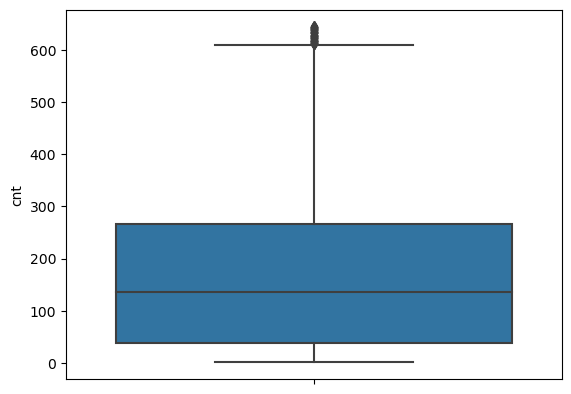

In [46]:
sns.boxplot(data=df_model,
            y = 'cnt')

Seperti yang bisa kita lihat di atas, Hitungan Total Pelanggan memiliki nilai 0 dan sebagian besar terpusat pada angka yang rendah (di bawah 300) dibandingkan rentang data (0-1000).  
MAPE bisa besar karena pada nilai yang lebih rendah, persentase kesalahannya akan besar.  
Kalau data aktualnya 2 dan prediksinya 10 maka 500%.  

Jadi, kita harus mengubah target menjadi skala sensitif yang tidak nol.

In [47]:
log_linreg = TransformedTargetRegressor(linreg, func=np.log1p, inverse_func=np.expm1)
log_knnreg = TransformedTargetRegressor(knnreg, func=np.log1p, inverse_func=np.expm1)
log_treereg = TransformedTargetRegressor(treereg, func=np.log1p, inverse_func=np.expm1)
log_rfreg = TransformedTargetRegressor(rfreg, func=np.log1p, inverse_func=np.expm1)
log_svreg = TransformedTargetRegressor(svreg, func=np.log1p, inverse_func=np.expm1)
log_xgbreg = TransformedTargetRegressor(xgbreg, func=np.log1p, inverse_func=np.expm1)
log_ridgereg = TransformedTargetRegressor(ridgereg, func=np.log1p, inverse_func=np.expm1)
log_lassoreg = TransformedTargetRegressor(lassoreg, func=np.log1p, inverse_func=np.expm1)
log_gradientreg = TransformedTargetRegressor(gradientreg, func=np.log1p, inverse_func=np.expm1)
logModel = [log_linreg,log_knnreg,log_treereg,log_svreg,log_rfreg,log_xgbreg,log_ridgereg,log_lassoreg,log_gradientreg]
logModelName = ['log_linreg','log_knnreg','log_treereg','log_svreg','log_rfreg','log_xgbreg','log_ridgereg','log_lassoreg','log_gradientreg']

In [48]:
# kandidat model

listMAEall = []
listMAEmean = []
listMAEstd = []

listMAPEall = []
listMAPEmean = []
listMAPEstd = []

listMSEall = []
listMSEmean = []
listMSEstd = []

listRMSEall = []
listRMSEmean = []
listRMSEstd = []

for model in logModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = x_train,
                             y = y_train,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

dfCVlog = pd.DataFrame()
dfCVlog['algo'] = logModelName
dfCVlog['MAEmean'] = listMAEmean
dfCVlog['MAEstd'] = listMAEstd
dfCVlog['MAEall'] = listMAEall
dfCVlog['MAPEmean'] = listMAPEmean
dfCVlog['MAPEstd'] = listMAPEstd
dfCVlog['MAPEall'] = listMAPEall
dfCVlog['MSEmean'] = listMSEmean
dfCVlog['MSEstd'] = listMSEstd
dfCVlog['MSEall'] = listMSEall
dfCVlog['RMSEmean'] = listRMSEmean
dfCVlog['RMSEstd'] = listRMSEstd
dfCVlog['RMSEall'] = listRMSEall
dfCVlog

,algo,MAEmean,MAEstd,MAEall,MAPEmean,MAPEstd,MAPEall,MSEmean,MSEstd,MSEall,RMSEmean,RMSEstd,RMSEall
0,log_linreg,-93.453034,4.432026,"[-91.54183626974137, -92.67626336008279, -93.7...",-1.208900,0.038986,"[-1.2509547058442885, -1.2445297619302593, -1....",-22181.707341,3515.323298,"[-19519.42619337579, -20691.85393290146, -2207...",-148.505565,11.305068,"[-139.71194005300976, -143.8466333735394, -148..."
1,log_knnreg,-50.925673,1.386455,"[-50.873089880689655, -49.83327535273477, -53....",-0.540732,0.014001,"[-0.5579854292507801, -0.5414900415006094, -0....",-6181.547768,407.230939,"[-5760.8167552765835, -6051.585764872067, -689...",-78.581088,2.561330,"[-75.90004450115022, -77.7919389453179, -83.00..."
2,log_treereg,-36.438730,1.600827,"[-34.19047619047619, -37.82275132275132, -34.9...",-0.396107,0.021433,"[-0.3703692415728834, -0.4106786570209765, -0....",-3716.572910,375.958383,"[-3193.2126984126985, -3982.937037037037, -336...",-60.884371,3.109055,"[-56.50851881276573, -63.11051447292311, -57.9..."
3,log_svreg,-119.357109,1.939514,"[-121.8648354986021, -116.14568333893408, -120...",-4.883065,0.021347,"[-4.924128562457765, -4.873485354149665, -4.86...",-24480.304070,960.234351,"[-25459.066854822377, -23066.13652175701, -256...",-156.431645,3.073168,"[-159.55897610232518, -151.8753980134933, -160..."
4,log_rfreg,-27.063942,0.417224,"[-26.51123139617156, -27.098550043706023, -27....",-0.286095,0.010659,"[-0.27511768345589155, -0.30450937441805004, -...",-2037.240933,108.424681,"[-1959.4124157541848, -1943.9229259490355, -19...",-45.120208,1.186501,"[-44.26525065730663, -44.08994132394639, -44.4..."
5,log_xgbreg,-24.776586,0.749789,"[-24.651608143912423, -24.10865509159981, -24....",-0.252937,0.007861,"[-0.24973874741822172, -0.25857499353528657, -...",-1692.998440,219.204735,"[-1646.551041381722, -1567.3255174463973, -153...",-41.066457,2.558234,"[-40.577716069065815, -39.5894622020355, -39.1..."
6,log_ridgereg,-93.274548,4.441177,"[-91.10502840430401, -92.54305759198382, -93.6...",-1.210380,0.039877,"[-1.2558583117623683, -1.2451820098942334, -1....",-21997.922324,3497.352125,"[-19218.971013980252, -20564.1333924918, -2194...",-147.885634,11.303161,"[-138.63250345420533, -143.401999262534, -148...."
7,log_lassoreg,-115.887362,2.528595,"[-118.09835237855964, -112.92199089331199, -11...",-2.069175,0.042318,"[-2.1364203569784626, -2.0906223203502976, -2....",-26519.264932,1160.182600,"[-27000.959421739983, -25054.93006309882, -284...",-162.808832,3.542498,"[-164.31968665299962, -158.28749180873015, -16..."
8,log_gradientreg,-42.852463,1.552661,"[-42.496297929117894, -41.79697635039045, -44....",-0.404671,0.004450,"[-0.4014431310923389, -0.403946525524, -0.3987...",-4454.702920,313.057445,"[-4311.582277595364, -4301.318210588333, -4751...",-66.702445,2.342381,"[-65.66263989206773, -65.58443573431377, -68.9..."


Setelah melakukan TransformedTargetRegressor() pada Cnt, terdapat banyak peningkatan pada skor MAPE, bahkan MAE menjadi sedikit lebih baik.

Berdasarkan Cross Validation di atas, kita dapat menyimpulkan bahwa  
`XGBRegressor()` adalah model dasar terbaik dengan MAPE 25% dan 24 MAE  
diikuti oleh
`RandomForestRegressor()` dengan 28% MAPE dan 27 MAE.

Kedua model ini cocok untuk tugas regresi dan memiliki kelebihannya masing-masing. XGBRegressor dikenal dengan teknik peningkatan gradiennya, yang mencapai akurasi tinggi dan menawarkan berbagai opsi lanjutan. RandomForestRegressor, di sisi lain, membangun kumpulan pohon keputusan, memberikan ketahanan terhadap overfitting dan kemudahan interpretasi melalui analisis kepentingan fitur. Pilihan di antara keduanya bergantung pada kebutuhan spesifik masalah, sifat data, dan keseimbangan antara akurasi, interpretabilitas, dan sumber daya komputasi.

## **Hyper Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [49]:
hyperParamXGB = {'model__regressor__max_depth': list(np.arange(2, 10)), 
                 'model__regressor__learning_rate': list(np.arange(1, 101, 10)/100),
                 'model__regressor__n_estimators': list(np.arange(200, 301, 20))}

pipeXGB = Pipeline([('Preprocess', transformer),
                    ('model',log_xgbreg)])

gridSearchXGB = GridSearchCV(estimator = pipeXGB,
                             param_grid = hyperParamXGB,
                             cv = 5,
                             scoring = ['neg_mean_absolute_error',
                                        'neg_mean_absolute_percentage_error',
                                        'neg_mean_squared_error',
                                        'neg_root_mean_squared_error'],
                             refit = 'neg_mean_absolute_percentage_error')

gridSearchXGB.fit(x_train, y_train)
display(gridSearchXGB.best_estimator_,
        gridSearchXGB.best_params_,
        gridSearchXGB.best_score_,
        pd.DataFrame(gridSearchXGB.cv_results_).sort_values(['rank_test_neg_mean_absolute_percentage_error',
                                                               'rank_test_neg_mean_absolute_error']))

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encodingOHE',
                                                  OneHotEncoder(),
                                                  ['weathersit', 'season',
                                                   'dayName'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None...
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.11,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=None, ...)))])

{'model__regressor__learning_rate': 0.11,
 'model__regressor__max_depth': 6,
 'model__regressor__n_estimators': 300}

-0.24026917519052118

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__learning_rate,param_model__regressor__max_depth,param_model__regressor__n_estimators,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,...,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
77,0.208025,0.021099,0.008208,0.000400,0.11,6,300,"{'model__regressor__learning_rate': 0.11, 'mod...",-23.228409,-22.597192,...,145.059187,1,-39.507669,-36.609349,-37.071664,-41.574379,-37.428473,-38.438307,1.855319,1
76,0.179163,0.016568,0.008007,0.001096,0.11,6,280,"{'model__regressor__learning_rate': 0.11, 'mod...",-23.292042,-22.666198,...,140.732552,2,-39.593559,-36.759408,-37.160069,-41.524318,-37.498268,-38.507124,1.798369,2
75,0.192353,0.012462,0.008207,0.000749,0.11,6,260,"{'model__regressor__learning_rate': 0.11, 'mod...",-23.374268,-22.781042,...,142.372505,7,-39.745006,-36.943414,-37.271625,-41.680239,-37.539575,-38.635972,1.812501,7
74,0.153185,0.011554,0.007607,0.000801,0.11,6,240,"{'model__regressor__learning_rate': 0.11, 'mod...",-23.482299,-22.938212,...,143.752936,10,-39.920397,-37.170037,-37.270713,-41.801352,-37.618154,-38.756131,1.824612,10
73,0.150144,0.012229,0.007207,0.000400,0.11,6,220,"{'model__regressor__learning_rate': 0.11, 'mod...",-23.610571,-23.052227,...,143.277671,11,-40.050115,-37.374523,-37.322134,-41.836577,-37.579300,-38.832530,1.815735,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.093885,0.011489,0.006606,0.000801,0.01,2,280,"{'model__regressor__learning_rate': 0.01, 'mod...",-72.630800,-69.266590,...,665.931567,475,-112.601949,-107.145456,-115.716977,-109.152356,-109.762711,-110.875890,2.984670,475
3,0.073448,0.009712,0.006606,0.000801,0.01,2,260,"{'model__regressor__learning_rate': 0.01, 'mod...",-74.306102,-70.756125,...,701.243072,477,-115.105422,-109.466635,-118.335855,-111.513135,-112.409813,-113.366172,3.074980,477
2,0.064841,0.009763,0.006406,0.000490,0.01,2,240,"{'model__regressor__learning_rate': 0.01, 'mod...",-76.039508,-72.460350,...,719.170854,478,-117.754430,-112.077764,-120.929370,-113.933048,-115.276183,-115.994159,3.084045,478
1,0.057124,0.003163,0.006206,0.000400,0.01,2,220,"{'model__regressor__learning_rate': 0.01, 'mod...",-77.919691,-74.137224,...,750.393942,479,-120.614822,-114.573393,-123.592921,-116.550062,-118.135148,-118.693269,3.148878,479


The `XGBRegressor()` get improved MAPE and MAE score.  
with 24% MAPE and 24 MAE.

In [50]:
# kandidat model

listMAEmean = []
listMAEstd = []

listMAPEmean = []
listMAPEstd = []

listMSEmean = []
listMSEstd = []

listRMSEmean = []
listRMSEstd = []

tuned_xgbreg = gridSearchXGB.best_estimator_

baseModel = [log_xgbreg]
tunedModel = [tuned_xgbreg]

baseModelName = ['log_xgbreg']
tunedModelName = ['tuned_xgbreg']

for model in baseModel :
    pipeModel = Pipeline([('prepro',transformer),
                          ('modeling', model)])
    cvScore = cross_validate(estimator=pipeModel,
                             X = x_train,
                             y = y_train,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())

for model in tunedModel :
    cvScore = cross_validate(estimator=model,
                             X = x_train,
                             y = y_train,
                             cv = 5,
                             scoring=['neg_mean_absolute_error',
                                      'neg_mean_absolute_percentage_error',
                                      'neg_mean_squared_error',
                                      'neg_root_mean_squared_error'])
    listMAEall.append(cvScore['test_neg_mean_absolute_error'])
    listMAEmean.append(cvScore['test_neg_mean_absolute_error'].mean())
    listMAEstd.append(cvScore['test_neg_mean_absolute_error'].std())
    listMAPEall.append(cvScore['test_neg_mean_absolute_percentage_error'])
    listMAPEmean.append(cvScore['test_neg_mean_absolute_percentage_error'].mean())
    listMAPEstd.append(cvScore['test_neg_mean_absolute_percentage_error'].std())
    listMSEall.append(cvScore['test_neg_mean_squared_error'])
    listMSEmean.append(cvScore['test_neg_mean_squared_error'].mean())
    listMSEstd.append(cvScore['test_neg_mean_squared_error'].std())
    listRMSEall.append(cvScore['test_neg_root_mean_squared_error'])
    listRMSEmean.append(cvScore['test_neg_root_mean_squared_error'].mean())
    listRMSEstd.append(cvScore['test_neg_root_mean_squared_error'].std())



dfCVbest = pd.DataFrame()
dfCVbest['algo'] = baseModelName + tunedModelName
dfCVbest['MAEmean'] = listMAEmean
dfCVbest['MAEstd'] = listMAEstd
dfCVbest['MAPEmean'] = listMAPEmean
dfCVbest['MAPEstd'] = listMAPEstd
dfCVbest['MSEmean'] = listMSEmean
dfCVbest['MSEstd'] = listMSEstd
dfCVbest['RMSEmean'] = listRMSEmean
dfCVbest['RMSEstd'] = listRMSEstd
dfCVbest

,algo,MAEmean,MAEstd,MAPEmean,MAPEstd,MSEmean,MSEstd,RMSEmean,RMSEstd
0,log_xgbreg,-24.776586,0.749789,-0.252937,0.007861,-1692.99844,219.204735,-41.066457,2.558234
1,tuned_xgbreg,-23.113306,0.588026,-0.240269,0.005788,-1480.94565,145.059187,-38.438307,1.855319


## **Predict to Testset**

Menyesuaikan model yang dipilih ke set pengujian memungkinkan kami mengevaluasi kinerjanya pada data yang tidak terlihat dan memverifikasi kemampuan generalisasinya.  
Ini memberikan perkiraan yang tidak memihak tentang seberapa baik kinerja model dan membantu dalam pengambilan keputusan untuk penerapan atau peningkatan lebih lanjut.

In [51]:
tuned_xgbreg.fit(x_train,y_train)
yPred = tuned_xgbreg.predict(x_test)
scoreAccTrain = tuned_xgbreg.score(x_train,y_train)
scoreMAPEtest = mean_absolute_percentage_error(y_test,yPred)
scoreMAEtest = mean_absolute_error(y_test,yPred)
scoreMSEtest = mean_squared_error(y_test,yPred)
scoreRMSEtest = np.sqrt(mean_squared_error(y_test,yPred))

dfTestScore = pd.DataFrame({'Model' : ['tuned_xgbreg'],
                           'scoreAccTrain' : [scoreAccTrain],
                           'scoreMAEtest' : [scoreMAEtest],
                           'scoreMAPEtest' : [scoreMAPEtest],
                           'scoreMSEtest' : [scoreMSEtest],
                           'scoreRMSEtest' : [scoreRMSEtest]})
dfTestScore

,Model,scoreAccTrain,scoreMAEtest,scoreMAPEtest,scoreMSEtest,scoreRMSEtest
0,tuned_xgbreg,0.975824,20.879116,0.222814,1143.364212,33.813669


MAPE pada set pengujian sedikit lebih baik dibandingkan pada pelatihan.  
Kita dapat mengatakan bahwa `XGBRegressor()` yang disetel ini bagus dalam menangkap data di luar data kereta.

Sekarang, mari kita lihat plot data prediksi dibandingkan dengan data sebenarnya.

### **Prediction: Visualization**

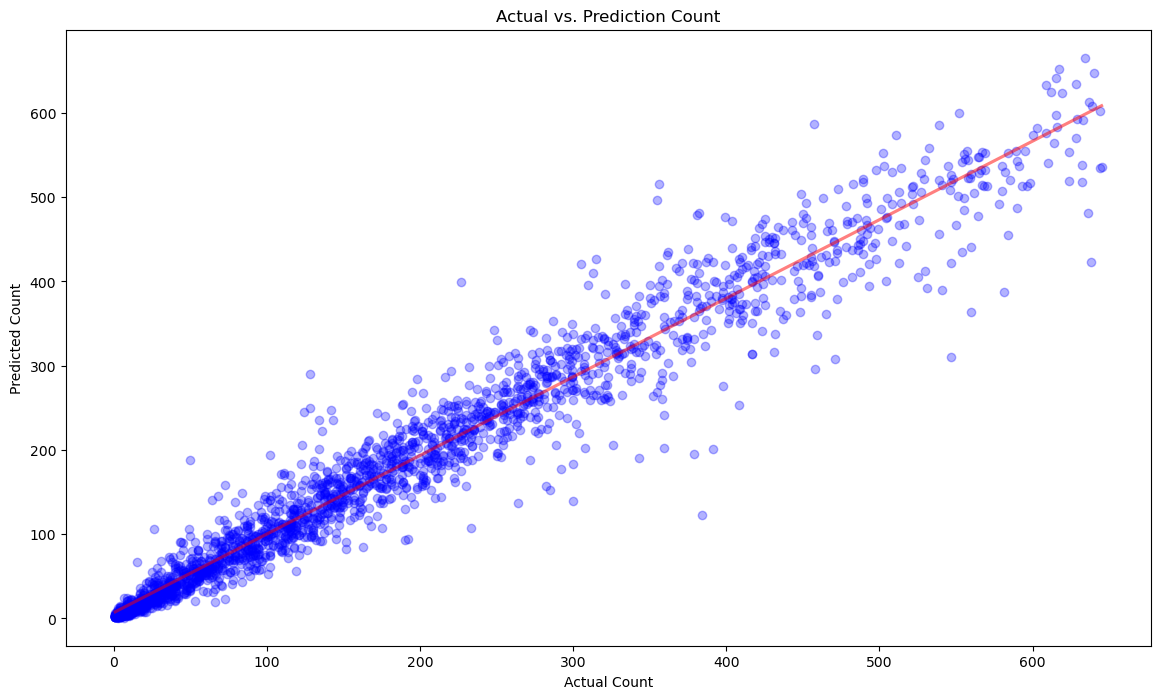

In [52]:
plt.figure(figsize=(14, 8))
sns.regplot(x=y_test, y=yPred, ci=None, scatter_kws = {'color': 'blue', 'alpha': 0.3}, line_kws = {'color': 'red', 'alpha': 0.5}).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count')
plt.show()

Di sini kita dapat melihat bahwa prediksi tersebut menghasilkan pola regresi yang jelas. namun ada beberapa data yang overestimated/undersetimated sehingga menjadikan MAPE cukup besar jika dibandingkan relatif dengan MAPE.

In [53]:
residual = y_test - yPred

dfResidual = pd.DataFrame({'yPred': yPred,
                           'residual': residual})

dfResidualFull = pd.DataFrame({'yTestBike': y_test,
                               'yPredBike': yPred,
                               'residual': residual})
display(dfResidualFull,
        dfResidual)

,yTestBike,yPredBike,residual
3881,78,69.493721,8.506279
1770,61,94.733498,-33.733498
9005,154,154.064835,-0.064835
1474,624,518.742065,105.257935
8062,489,432.313599,56.686401
...,...,...,...
73,373,323.155182,49.844818
2460,187,224.002380,-37.002380
2986,238,211.957993,26.042007
1926,49,43.590267,5.409733


,yPred,residual
3881,69.493721,8.506279
1770,94.733498,-33.733498
9005,154.064835,-0.064835
1474,518.742065,105.257935
8062,432.313599,56.686401
...,...,...
73,323.155182,49.844818
2460,224.002380,-37.002380
2986,211.957993,26.042007
1926,43.590267,5.409733


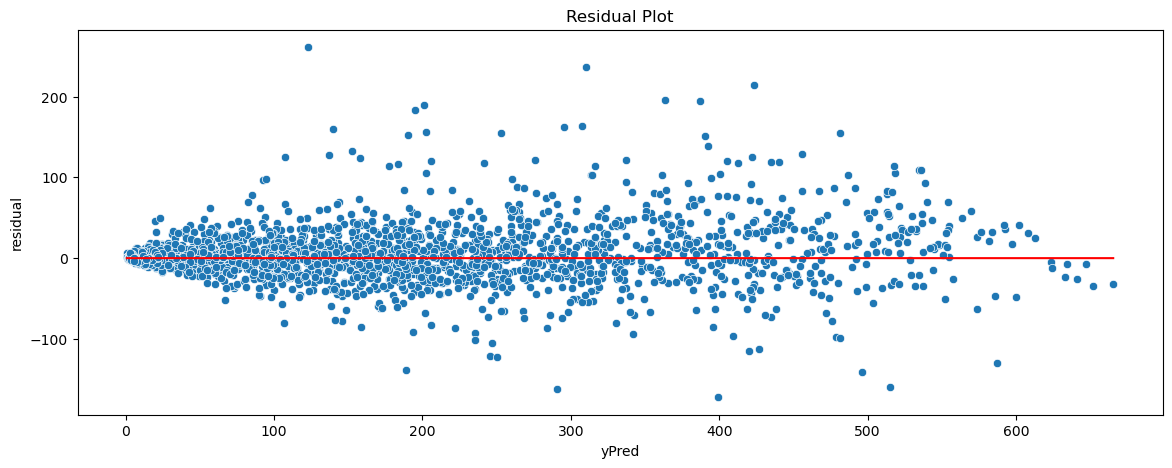

In [54]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=dfResidual, x='yPred', y='residual')
sns.lineplot(data=dfResidual, x='yPred', y=0, color='red')
plt.title('Residual Plot')
plt.show()


Kita bisa melihat alasan MAPE menjadi cukup besar ~22% di sini. Ada beberapa prediksi yang mempunyai selisih/sisa yang besar sehingga bila kita terapkan persentase maka akan menghasilkan persentase yang besar, terutama pada jumlah total pelanggan yang rendah.  

## **Feature Importance**

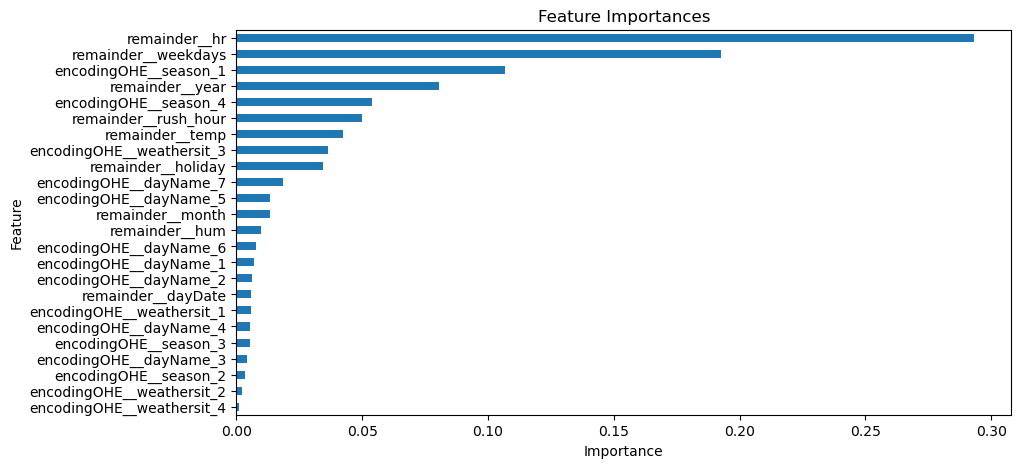

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the best model from GridSearchCV
best_model = gridSearchXGB.best_estimator_

# Extract the trained XGBoost regressor from the pipeline
tuned_xgbreg = best_model.named_steps['model'].regressor_

# Ensure transformer is fitted
# Since transformer is part of the pipeline, it gets fitted during the pipeline fitting
# Extract feature names from the transformer
feature_names = best_model.named_steps['Preprocess'].get_feature_names_out()

# Get the feature importances from the trained XGBoost model
feature_importances = tuned_xgbreg.feature_importances_

# Create a Pandas Series with feature importances
featureImp = pd.Series(feature_importances, index=feature_names).sort_values()

# Plot the feature importances
plt.figure(figsize=(10, 5))
featureImp.plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Dalam `XGBRegressor()`  fitur yang memiliki dampak terbesar terhadap total pelanggan adalah:

1.hour
2.weekdays
3.season
4.year



## **Estimasi Keuntungan**

In [65]:
predicted_demand = yPred

bike_share_fee = 7  
num_bikes = 970  


revenue = predicted_demand * bike_share_fee

df = pd.DataFrame({
    "Metric": ["Predicted Demand", "Revenue"],
    "Value": [predicted_demand, revenue]
})

print(df)

             Metric                                              Value
0  Predicted Demand  [69.49372, 94.7335, 154.06483, 518.74207, 432....
1           Revenue  [486.45605, 663.13446, 1078.4539, 3631.1943, 3...


# **Conclusion**

Berdasarkan skor benchmarking model, kami mendapatkan `XGBRegressor()` (dengan ~25% MAPE dan ~24 MAE) dan `RandomForestRegressor()` (dengan ~27% MAPE dan ~27 MAE) sebagai model teratas.  
Kemudian, kami melakukan penyetelan hyperparameter pada `XGBRegressor()` yang disetel sebagai model terbaik (dengan ~24% MAPE dan ~23 MAE).  
Setelah kami memasukkannya ke dalam Test Set, menjadi lebih baik lagi dengan ~22% MAPE dan ~20 MAE. Artinya, model yang kita pilih bagus dalam memprediksi data di luar train set dan bisa baik/stabil dalam memprediksi data baru nantinya.   

Rentang data kereta kami berkisar dari 1 total pelanggan hingga maksimal 970 total pelanggan, yang berarti model ini bagus dalam memprediksi data dalam rentang ini dan mungkin menjadi kurang akurat untuk memprediksi di luar data ini.  

MAPE disini merupakan metrik utama yang kami gunakan dalam memilih model terbaik karena paling mudah diinterpretasikan oleh manusia.  
Dalam model akhir kita, ini berarti model tersebut dapat menebak total pelanggan dengan kesalahan sekitar ~22%. Tampaknya jumlah kesalahannya masih besar, tetapi kita dapat membenarkan model kita dengan melihat MAE, yang berarti bahwa model tersebut, berdasarkan nilai sebenarnya, meleset sekitar ~20 poin dari angka sebenarnya.   Ini bisa menjadi persentase kesalahan yang besar jika kita memperkirakan jumlah total pelanggan yang rendah (jika sebenarnya 10 pelanggan, maka mungkin diprediksi sebanyak 30 pelanggan - persentase besar). Namun, jika kita memperkirakan jumlah total pelanggan yang tinggi, modelnya akan lebih akurat (jika jumlah pelanggan sebenarnya adalah 500 pelanggan, maka prediksinya adalah 520 pelanggan - persentasenya kecil).  

Kembali lagi, MAPE masih cukup besar karena jumlah pelanggan yang rendah tidak dapat diprediksi seakurat jumlah pelanggan yang tinggi. Hal ini dikarenakan fitur yang kita miliki pada pemodelan ini terbatas dan dapat menimbulkan bias.

Jika kita melihat featur Importance, kita dapat melihat bahwa waktu sewa (jam), status hari kerja, tahun, musim, dan suhu merupakan variabel utama yang membentuk prediksi. Hal ini dapat membantu Tim Strategis Bisnis Capital Bikeshare memperkirakan total pelanggan tahun depan. Kami hanya memiliki data 2 tahun. pola prediksinya bisa saja sama berdasarkan ciri lain, tapi kalau dilihat dari tahunnya naik. Jadi, tahun depan mungkin diprediksi akan naik urutan total pelanggannya.  

Tim Strategi Bisnis Capital Bikeshare juga ingin memperluas ke lokasi lain. Kita dapat melihat di sini bahwa sekarang mereka dapat memprediksi berdasarkan variabel-variabel tersebut untuk mendapatkan total pelanggan potensial dengan model ini. Namun prediksi tersebut mengabaikan sebagian besar fitur lokasi, hanya suhu, kelembapan, dan cuaca yang dapat menggambarkan lokasi lain. Sementara itu, itu bukan fitur yang paling berdampak pada model.

Namun model ini masih dapat diperbaiki untuk meminimalisir MAPE yang besar karena datanya terlihat lebih akurat dalam memprediksi angka yang lebih tinggi jika dibenarkan dengan MAE.

# **Recommendation**

Berikut beberapa rekomendasi berdasarkan pilihan model kami:
1. Karena kita tahu bahwa angka yang rendah dapat diprediksi dengan kurang akurat dibandingkan angka yang tinggi, kita dapat melihat lebih jauh apa yang menyebabkan angka yang rendah dapat diprediksi menjadi kurang akurat. Fitur kami dalam regresi ini sebagian besar adalah fitur kategorikal yang dapat memperoleh suatu pola. Angka rendah yang kurang akurat mungkin disebabkan oleh adanya pola yang membingungkan di antara fitur-fiturnya. Dengan mengetahui fitur apa saja yang membingungkan pembelajaran, kita dapat melakukan rekayasa fitur lebih mendalam terhadap fitur tersebut.  

2. Berdasarkan kumpulan data pertama kita dapat melihat bahwa fitur tersebut terbatas. Terutama, sebagian besar fiturnya adalah fitur berbasis waktu. Satu-satunya fitur yang tidak berbasis waktu adalah suhu, kelembapan, dan cuaca. Itu adalah variabel lingkungan. Kita dapat menambahkan lebih banyak variabel yang dapat mewakili lingkungan sehingga model dapat memprediksi lokasi lain (perkembangan bisnis) dengan lebih akurat. Selain itu, jika kita ingin memprediksi lokasi lain, informasi populasi seperti demografi atau kepadatan penduduk dapat ditambahkan. Karena bisa juga berdampak pada total pelanggan.  

3. Kemungkinan model ini dapat diperbaiki dengan menggunakan model yang lebih kompleks, seperti melakukan ansambel pada beberapa model atau model yang kompleks seperti Recursive Neural Networks (RNN) untuk lebih meminimalkan kesalahan. Tapi tetap saja, fitur-fiturnya perlu ditambahkan lebih banyak.

4. Melakukan Analysis Lebih Mendalam untuk mendapatkan info yang lebih berguna untuk melakukan riset lebih lanjut.

5. Melakukan Pemaksimalan pada Fitur Fitur yg memang berpengaruh pada total pelanggan



mari simpan model terbaik kita terlebih dahulu.

In [57]:
# Save model
# import pickle

# estimator = tuned_xgbreg
# estimator.fit(x_train, y_train)

# pickle.dump(estimator, open('Model_Bikeshare_XGB.sav', 'wb'))

In [58]:
# Load model
# filename = 'Model_Bikeshare_XGB.sav'
# loadedModel = pickle.load(open(filename, 'rb'))
# loadedModel

In [64]:
# Run Test Model
# display('MAPE',
        #mean_absolute_percentage_error(y_test, loadedModel.predict(x_test)),
        #'MAE',
        #mean_absolute_error(y_test, loadedModel.predict(x_test)))